In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib as mpl
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import pygrts
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import Point

import df_utils

In [2]:
rng = np.random.default_rng(100)

In [3]:
num_samples = 50
sparse = np.c_[
    rng.uniform(low=-90, high=-80, size=num_samples),
    rng.uniform(low=42, high=46, size=num_samples),
]
dense = np.c_[
    rng.uniform(low=-86.5, high=-86, size=int(num_samples * 0.25)),
    rng.uniform(low=44, high=45, size=int(num_samples * 0.25)),
]
data = np.vstack((sparse, dense))

In [4]:
df = df_utils.frame_from_coords(data)

In [5]:
qt = pygrts.QuadTree(df, force_square=False)
splits = []
n = 3
for i in range(n):
    qt.split()
    splits.append(qt.to_frame())

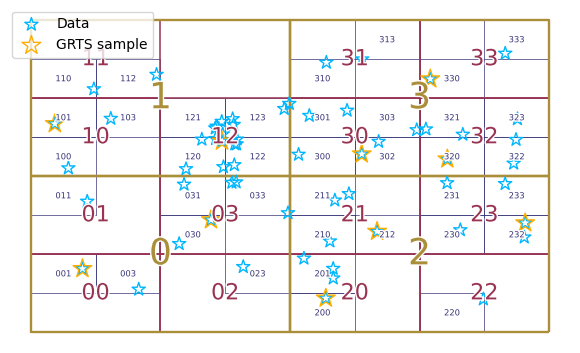

In [6]:
figsize = (6, 4)
mpl.rcParams['figure.figsize'] = figsize
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.05

fig, ax = plt.subplots(figsize=figsize)

fontsize = 6
lw = 0.5
for l, (color, frame) in enumerate(
    zip(["#363377", "#983352", "#AA8E39", "#609732"], splits[::-1])
):
    frame.plot(color="none", ec=color, lw=lw, ax=ax)
    for row in frame.itertuples():
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            row.uid,
            size=fontsize,
            color=color,
            ha="center",
            va="center",
            path_effects=[pe.withStroke(linewidth=2, foreground="white")],
        )
    fontsize += 10
    lw += 0.6

df.plot(
    color="none", ec="#00b6ff", lw=1, markersize=100, marker="*", label="Data", ax=ax
)
qt.sample(n=10, samples_per_grid=1, random_state=100).plot(
    color="none", ec="#ffae00", lw=1, markersize=200, marker="*", label="GRTS sample", ax=ax
)

ax.legend()
ax.axis("off")
plt.tight_layout()
plt.savefig("../data/grts_hierarchy.png")

In [7]:
nrows = 1
ncols = splits[-1].shape[0]
z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

(0.0, 38.0, 0.0, 1.0)

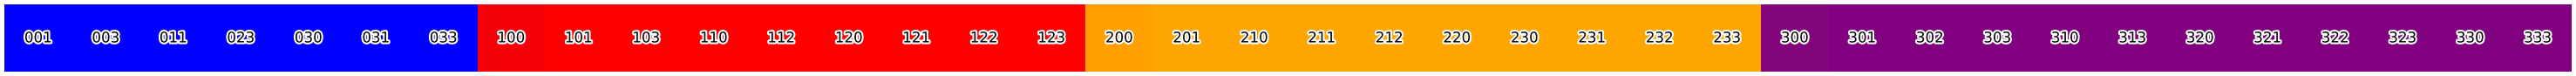

In [8]:
fig, ax = plt.subplots(figsize=(ncols, 1))

colors = []
for i, row in enumerate(splits[-1].itertuples()):
    if row.uid.startswith("0"):
        colors.append("blue")
    elif row.uid.startswith("1"):
        colors.append("red")
    elif row.uid.startswith("2"):
        colors.append("orange")
    elif row.uid.startswith("3"):
        colors.append("purple")
cmap = LinearSegmentedColormap.from_list("", colors)
ax.pcolormesh(x, y, z, cmap=cmap)
for i, row in enumerate(splits[-1].itertuples()):
    ax.text(
        i + 0.5,
        0.5,
        row.uid,
        size=12,
        ha="center",
        va="center",
        path_effects=[pe.withStroke(linewidth=3, foreground="white")],
    )
ax.axis("off")